In [11]:
from sklearn import *
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 


# Understanding the data

In [12]:
# dataframe = pd.read_csv('math_outputs.csv').drop(['Unnamed: 0'], axis='columns')
dataframe = pd.read_csv('kmeans_output.csv').drop(['Unnamed: 0'], axis='columns')

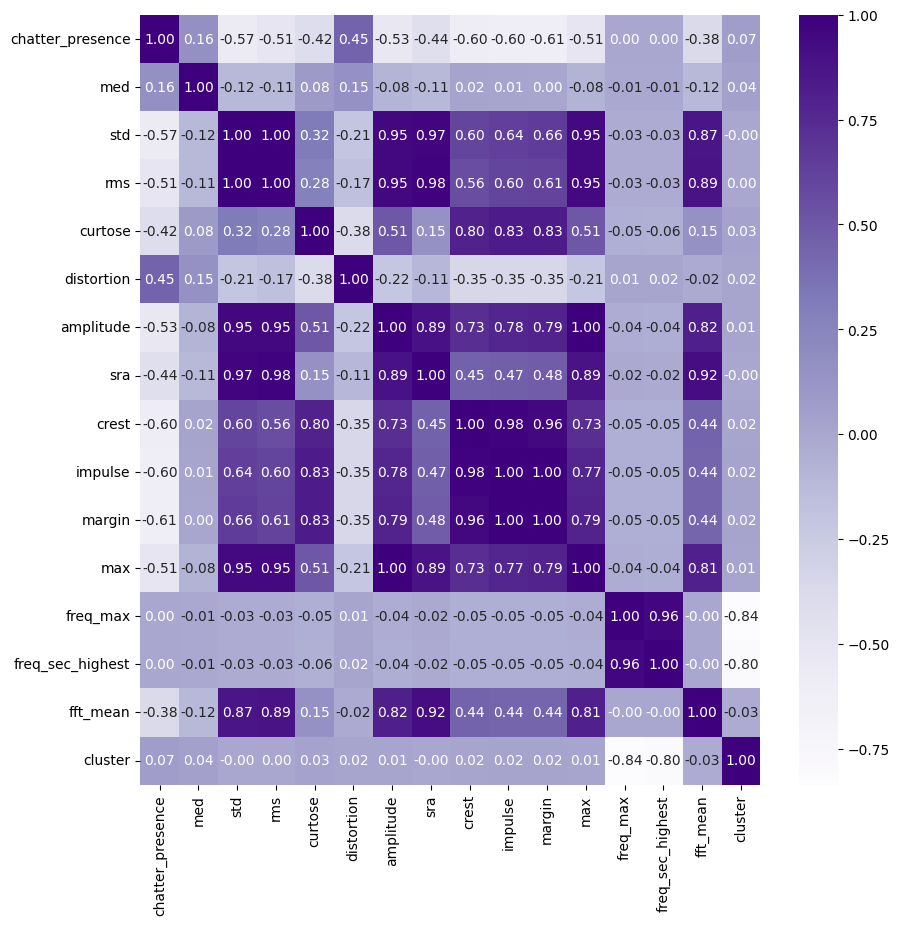

In [15]:
correlation = dataframe.drop(['Experiment', 'Unnamed: 0.1'], axis='columns')
correlation.corr(method="pearson")

plt.figure(figsize=(10,10))
sns.heatmap(correlation.corr(method="pearson"), annot=True, fmt=".2f", cmap='Purples')
plt.show()


<AxesSubplot: xlabel='chatter_presence', ylabel='freq_sec_highest'>

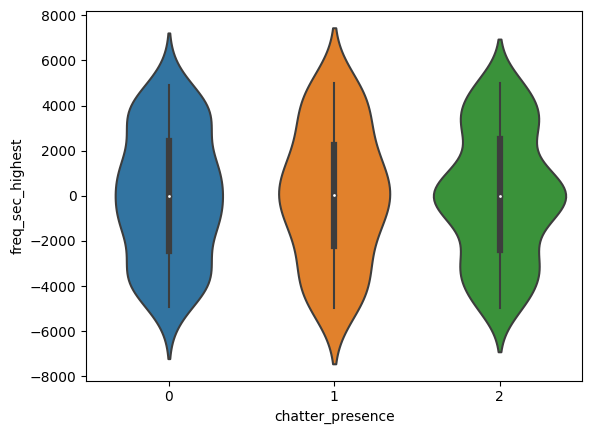

In [ ]:
sns.violinplot(data=dataframe, x='chatter_presence', y='freq_sec_highest')

# Treating data

In [ ]:
# dataframe = pd.get_dummies(dataframe, columns=['chatter_presence'], drop_first=True)
# dataframe.head(1)


In [ ]:
# dataframe["chatter_presence_s"] = dataframe["chatter_presence_s"].astype('bool')
# dataframe.dtypes

In [ ]:
# y = dataframe['chatter_presence_s']
# x = dataframe.copy().drop(['Experiment', 'chatter_presence_s'], axis="columns", inplace=False)
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=2/3, random_state=0)

In [16]:
y = dataframe['cluster']
x = dataframe.copy().drop(['Experiment', 'cluster'], axis="columns", inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=2/3, random_state=0)

# Models

In [ ]:
lreg = LinearRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
classifier_linear = SVC(kernel = 'linear', random_state = 0) # SVM
classifier_rbf = SVC(kernel = 'rbf', random_state = 0) # SVM

## Random Forest


In [ ]:
rf_start = time.time()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
rf_end = time.time()

In [ ]:
acc_rf = accuracy_score(y_test, rf_pred)
acc_rf

0.9918032786885246

### GridSearchCV

In [ ]:
# params_rf = { 
#     'n_estimators': [5, 10, 15, 30, 40, 50],
#     'max_features': ['auto'],
#     'max_depth' : [4,5,6,7,8, 9, 10, 11],
#     "min_samples_split": [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 7, 9, 11],
#     'criterion' :['poisson', 'gini', 'squared_error', 'absolute_error', 'friedman_mse']
# }

In [ ]:
# CV_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv= 5)

In [ ]:
# CV_rf.fit(x_train, y_train)
# clear_output()

In [ ]:
# CV_rf.best_params_

In [ ]:
# CV_rf.best_score_

'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 30

In [ ]:
rf_start_grid = time.time()

In [ ]:
params_rf_grid = {'criterion': ['gini'],
 'max_depth': [4],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [15]}

In [ ]:
CV_rf_grid = GridSearchCV(estimator=rf, param_grid=params_rf_grid, cv= 5)

In [ ]:
CV_rf_grid.fit(x_train, y_train)

/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the defaul

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [15]})

In [ ]:
rf_pred_grid = CV_rf_grid.predict(x_test) # .best_estimator_

In [ ]:
rf_end_grid = time.time()

In [ ]:
acc_rf_grid = accuracy_score(y_test, rf_pred_grid)
acc_rf_grid 

0.9918032786885246

In [ ]:
time_a = rf_end_grid - rf_start_grid
time_a

0.22748565673828125

## Decision Tree

In [ ]:
dt_start = time.time()

In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(x_test)

In [ ]:
dt_end = time.time()

In [ ]:
acc_dt = accuracy_score(y_test, dt_pred)
acc_dt

0.9918032786885246

### GridSearchCV

In [ ]:
dt_params = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(3,80), 
    'min_samples_leaf': range(1,15),
    'max_leaf_nodes': range(1,50),
} #[3,5,8,15,30,40,50,60, 80]

In [ ]:
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)

dt_start_grid = time.time()
dt_grid.fit(x_train, y_train)

/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10780 fits failed out of a total of 528220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10780 fits failed with the following error:
Traceback (most recent call last):
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/naju/.local/lib/python3.10/site-pac

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 80),
                         'max_leaf_nodes': range(1, 50),
                         'min_samples_leaf': range(1, 15)})

In [ ]:
print(dt_grid.best_estimator_)
print(dt_grid.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)
1.0


DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)
1.0

In [ ]:
dt_grid.best_estimator_.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=2)

In [ ]:
dt_pred_grid = dt_grid.best_estimator_.predict(x_test)

In [ ]:
dt_end_grid = time.time()

In [ ]:
acc_dt_grid = accuracy_score(y_test, dt_pred_grid)
acc_dt_grid

0.9918032786885246

## KNN

In [ ]:
knn_start = time.time()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
knn_end = time.time()

In [ ]:
acc_knn = accuracy_score(y_test, knn_pred)
acc_knn

0.9262295081967213

### GridSearch

In [ ]:
params = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
knn_grid = GridSearchCV(KNeighborsClassifier(), params, cv=11, scoring='accuracy')

knn_start_grid = time.time()
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=11, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(knn_grid.best_estimator_)
print(knn_grid.best_score_)

KNeighborsClassifier(metric='manhattan', n_neighbors=43)
0.975206611570248


KNeighborsClassifier(metric='manhattan', n_neighbors=43)
0.975206611570248

In [ ]:
knn_grid.best_estimator_.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=43)

In [ ]:
knn_grid_pred = knn_grid.predict(x_test)

In [ ]:
knn_end_grid = time.time()

In [ ]:
acc_knn_grid = accuracy_score(y_test, knn_grid_pred)
acc_knn_grid

0.9590163934426229

## SVM

### Linear

In [ ]:
cl_start = time.time()
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
svm_linear_pred = classifier_linear.predict(x_test)
cl_end = time.time()

In [ ]:
acc_svm_linear = accuracy_score(y_test, svm_linear_pred)
acc_svm_linear
# acc_svm_linear = 0.8809523809523809

1.0

#### GridSearchCV Linear SVM


In [ ]:
params_svm_linear = {'C': [0.1, 1, 10, 100, 1000], # 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], # 
              'kernel': ['linear']} 

In [ ]:
classifier_linear_grid = GridSearchCV(classifier_linear, params_svm_linear, refit = True, verbose = 3)


In [ ]:
cl_start_grid = time.time()
classifier_linear_grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.979 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [ ]:
print(classifier_linear_grid.best_estimator_) # C=0.1, gamma=1, kernel='linear', random_state=0
print(classifier_linear_grid.best_score_)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)
0.9917517006802722


SVC(C=0.1, gamma=1, kernel='linear', random_state=0)
0.9917517006802722

In [ ]:
classifier_linear_grid.best_estimator_.fit(x_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)

In [ ]:
pred_svm_linear_grid = classifier_linear_grid.predict(x_test)
cl_end_grid = time.time()

In [ ]:
acc_svm_linear_grid = accuracy_score(y_test, pred_svm_linear_grid)
acc_svm_linear_grid

1.0

### rbf

In [ ]:
rbf_start = time.time()
classifier_rbf.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
svm_rbf_pred = classifier_rbf.predict(x_test)
rbf_end = time.time()

In [ ]:
acc_svm_rbf = accuracy_score(y_test, svm_rbf_pred)
acc_svm_rbf

0.9508196721311475

#### GridSearchCV rbf

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
classifier_rbf_grid = GridSearchCV(classifier_rbf, param_grid=param_grid, cv=cv)
classifier_rbf_grid.fit(x_train, y_train)


# # acc_svm_rbf_grid = grid.best_score_
# # print(
# #     "The best parameters are %s with a score of %0.5f"
# #     % (grid.best_params_, grid.best_score_)
# # )

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(random_state=0),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
                         'gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])})

In [ ]:
print(classifier_rbf_grid.best_estimator_)
print(classifier_rbf_grid.best_score_)

SVC(C=10000.0, gamma=1e-09, random_state=0)
1.0


SVC(C=10000.0, gamma=1e-09, random_state=0)
1.0

In [ ]:
crbf_start_grid = time.time()
classifier_rbf_grid.best_estimator_.fit(x_train, y_train)

SVC(C=10000.0, gamma=1e-09, random_state=0)

In [ ]:
pred_svm_rbf_grid = classifier_rbf_grid.predict(x_test)
crbf_end_grid = time.time()

In [ ]:
acc_svm_rbf_grid = accuracy_score(y_test, pred_svm_rbf_grid)

In [ ]:
# acc_svm_rbf_grid = 0.8297

# Artificial Neural Network

# Model results

In [ ]:
results = pd.DataFrame(
    np.array([[acc_svm_linear, acc_svm_linear_grid, acc_svm_rbf, acc_svm_rbf_grid,               acc_rf,         acc_rf_grid,                acc_dt,         acc_dt_grid,                acc_knn,  acc_knn_grid]]),
    columns=['svm_linear',    'svm_linear_gridsearch',    'svm_rbf',   'svm_rbf_gridsearch',    'random_forest', 'random_forset_gridsearch', 'decision_tree', 'decision_tree_gridsearch', 'knn',    'knn_grid'],
    index=['accuracy_score']
)

In [ ]:
results.round(4)

,svm_linear,svm_linear_gridsearch,svm_rbf,svm_rbf_gridsearch,random_forest,decision_tree,decision_tree_gridsearch,knn,knn_grid
accuracy_score,1.0,1.0,0.9508,0.9754,0.9918,0.9918,0.9918,0.9262,0.959


In [ ]:
results.to_csv('results.csv')


# cross-validation

In [ ]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
classifier_linear = SVC(kernel = 'linear', random_state = 0) # SVM
classifier_rbf = SVC(kernel = 'rbf', random_state = 0) # SVM

In [ ]:
# Cross-validation
from sklearn.model_selection import ShuffleSplit

cv_start = time.time()

n_samples = x.shape[0]
cv = ShuffleSplit(n_splits = 8, test_size = 0.2, random_state = 0)

results_cv = []
for i in range(0,5):
    model_name = ("Random Forest", "Decision Tree", 
              "KNN", "Classifier linear", 
              'Classifier rbf')
    model = (rf, dt, knn, classifier_linear, classifier_rbf)
    
    # print(model_name[i], ", score:", cross_val_score(model[i], x, y, cv=cv, scoring="accuracy"))
    print(model_name[i], ", lowest score:", min(cross_val_score(model[i], x, y, cv=cv, scoring="accuracy")).round(4)*100)
    results_cv.append([model_name[i], min(cross_val_score(model[i], x, y, cv=cv, scoring="accuracy"))])

cv_end = time.time()


Random Forest , lowest score: 98.63
Decision Tree , lowest score: 98.63
KNN , lowest score: 91.78
Classifier linear , lowest score: 98.63
Classifier rbf , lowest score: 94.52000000000001


# Time

In [ ]:
times = pd.DataFrame(
    np.array([[cv_end - cv_start, cl_end - cl_start, cl_end_grid - cl_start_grid, rbf_end - rbf_start, crbf_end_grid - crbf_start_grid, rf_end - rf_start, rf_end_grid - rf_start_grid, dt_end - dt_start, dt_end_grid - dt_start_grid, knn_end - knn_start, knn_end_grid - knn_start_grid]]),
    columns=['cross-validation', 'svm_linear',    'svm_linear_gridsearch',    'svm_rbf',   'svm_rbf_gridsearch', 'random_forest', 'random_forest_gridsearch', 'decision_tree', 'decision_tree_gridsearch', 'knn',    'knn_grid'],
    index=['duration (s)']
)

In [ ]:
times.round(3)

,cross-validation,svm_linear,svm_linear_gridsearch,svm_rbf,svm_rbf_gridsearch,random_forest,decision_tree,decision_tree_gridsearch,knn,knn_grid
duration (s),0.779,0.088,6.364,2.558,0.73,0.199,0.135,1034.167,2.802,7.031


In [ ]:
times.to_csv('model_time_in_s.csv')

In [ ]:
times_acc = pd.DataFrame(
    np.array([(cv_end - cv_start, cl_end - cl_start, cl_end_grid - cl_start_grid, rbf_end - rbf_start, crbf_end_grid - crbf_start_grid, rf_end - rf_start, rf_end_grid - rf_start_grid, dt_end - dt_start, dt_end_grid - dt_start_grid, knn_end - knn_start, knn_end_grid - knn_start_grid),
              ("-", acc_svm_linear, acc_svm_linear_grid, acc_svm_rbf, acc_svm_rbf_grid, acc_rf, acc_rf_grid, acc_dt, acc_dt_grid, acc_knn,  acc_knn_grid),
              ("-", results_cv[3][1], acc_svm_linear_grid, results_cv[4][1], acc_svm_rbf_grid, results_cv[0][1], acc_rf_grid, results_cv[1][1], acc_dt_grid, results_cv[2][1],  acc_knn_grid)]),
    columns=['cross-validation', 'svm_linear',    'svm_linear_gridsearch',    'svm_rbf',   'svm_rbf_gridsearch', 'random_forest', 'random_forest', 'decision_tree', 'decision_tree_gridsearch', 'knn',    'knn_gridsearch'],
    index=[['duration (s)', 'accuracy_score', "cross-validation accuracy_score"]]
)

In [ ]:
times_acc.dtypes

cross-validation            object
svm_linear                  object
svm_linear_gridsearch       object
svm_rbf                     object
svm_rbf_gridsearch          object
random_forest               object
decision_tree               object
decision_tree_gridsearch    object
knn                         object
knn_grid                    object
dtype: object

In [ ]:
for col in times_acc.columns:
    times_acc[col] = times_acc[col].map(lambda x: x[:6])

In [ ]:
times_acc

,cross-validation,svm_linear,svm_linear_gridsearch,svm_rbf,svm_rbf_gridsearch,random_forest,decision_tree,decision_tree_gridsearch,knn,knn_grid
duration (s),1.4806,0.0883,6.3644,2.5575,0.7298,0.1993,0.1347,1034.1,2.8024,7.0310
accuracy_score,-,1.0,1.0,0.9508,0.9754,0.9918,0.9918,0.9918,0.9262,0.9590
cross-validation accuracy_score,-,0.9863,1.0,0.9452,0.9754,0.9863,0.9863,0.9918,0.9178,0.9590


# Optimization